(unofficial) companion examples to Weakly Connected Neural Networks by Hoppensteadt & Izhikevich  
roman numerals in file name indicate the corresponding book chapter

Consider the ODE for a Hopf oscillator as decribed by wikipedia: [Hopf Bifurcation](https://en.wikipedia.org/wiki/Hopf_bifurcation)
$$\frac{dz}{dt}=z((\lambda +i)+b|z|^{2})$$  
which for simplicity we assume to have a frequency of oscillation equal to zero and a real-valued initial condition (i.e. no imaginary part), thus making the ODE be:
$$\frac{dz}{dt}=z(\lambda+b|z|^{2})$$  
This is a dynamical system with a vector function that is sufficiently smooth for its parameters $\lambda$ and $b$. A sample of the cases when $\lambda \in \mathbf{R}$ and $b < 0 $ are shown:

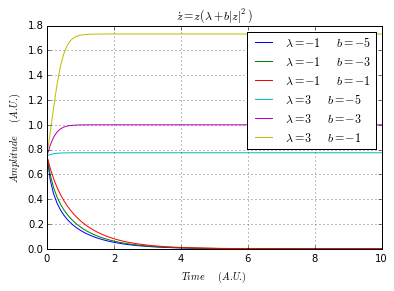

In [147]:
# prepared by Iran Roman (iran@stanford.edu)

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import StringIO 

# this is the ODE we will integrate
def zdot(z, t, lda, b):    
    dzdt = z*(lda + b*abs(z)**2)
    return dzdt

# innitial condition and time vector
z0 = 0.75
t = np.linspace(0,10,101)

# iterate over different values from lambda and b 
# and visualize the function
for lda in np.linspace(-1,3,2):
    for b in np.linspace(-5,-1,3):

        sol = odeint(zdot, z0, t, args=(lda, b))

        plt.plot(t,sol,label = "$\lambda = %d \quad b = %d$" % (lda , b))
        plt.legend()

plt.title("$\dot{z}=z(\lambda+b|z|^{2})$")
plt.ylabel("$Amplitude \quad (A.U.)$")
plt.xlabel("$Time \quad (A.U.)$")
plt.grid(True)           
plt.show()